# Hi!

I'm **Rizky Anshari**,
This notebook is my form of evaluation.

Please take a look and learn.

# Background
Stroke is a condition that occurs when the blood supply to the brain is disrupted or reduced due to blockage (ischemic stroke) or rupture of blood vessels (hemorrhagic stroke). Without blood supply, the brain will not get oxygen and nutrient intake, so cells in some areas of the brain will die. This condition causes parts of the body controlled by damaged areas of the brain to not function properly.

# The Objective
This project is an overview of what if patient data is processed to be used as a tool for initial analysis of doctors and other medical personnel in the treatment of someone who is suspected of having a stroke.

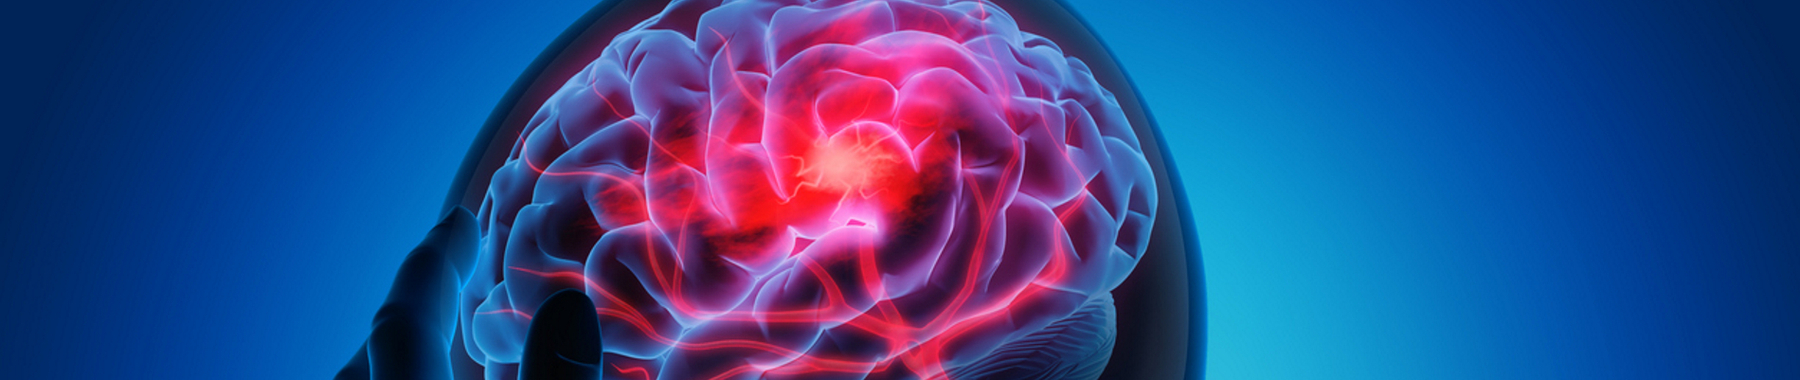

In [3]:
Image(filename='stroke.jpg') 

## Library use 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import phik
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder


## Data loading

In [2]:
df = pd.read_csv('stroke-dataset.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [5]:
df.shape

(5110, 12)

# Exploratory Data Analysis


In [6]:
df.columns = [column.lower() for column in df.columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Duplicated

In [9]:
df.duplicated().sum()

0

### Missing value

In [10]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
df[["bmi"]] = df[["bmi"]].fillna(df[["bmi"]].mean())
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Drop column id

In [12]:
df = df.drop(columns=["id"])

### Outlier 

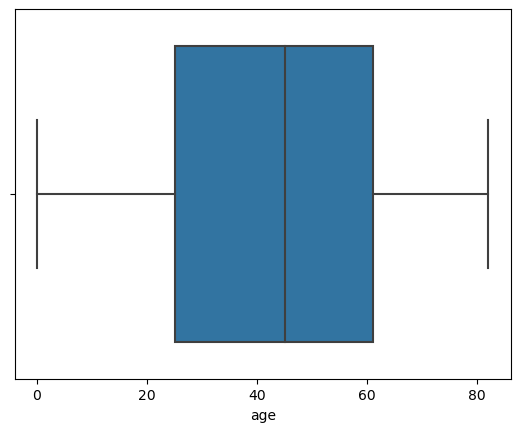

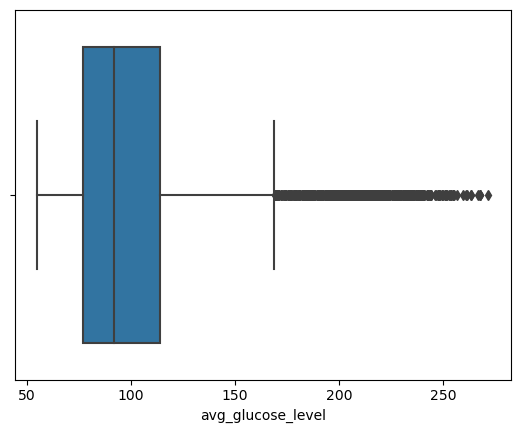

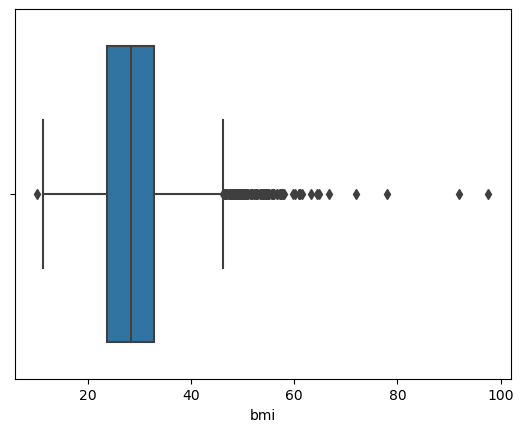

In [13]:
numerical_columns = ["age", "avg_glucose_level", "bmi"]
for column in numerical_columns:
    sns.boxplot(x=df[column])
    plt.show()

### Outlier handling

In [14]:
print("Total data sebelum dihapus outliers: ", df.shape[0])
for column in numerical_columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    iqr_low  = q1 - 1.5*iqr
    iqr_high = q3 + 1.5*iqr
    df = df.loc[(df[column] > iqr_low) & (df[column] < iqr_high)]
print("Total data sebelum dihapus outliers: ", df.shape[0])

Total data sebelum dihapus outliers:  5110
Total data sebelum dihapus outliers:  4383


### Categorical Features

        Total data  Persentase
Female        2585        59.0
Male          1797        41.0
Other            1         0.0



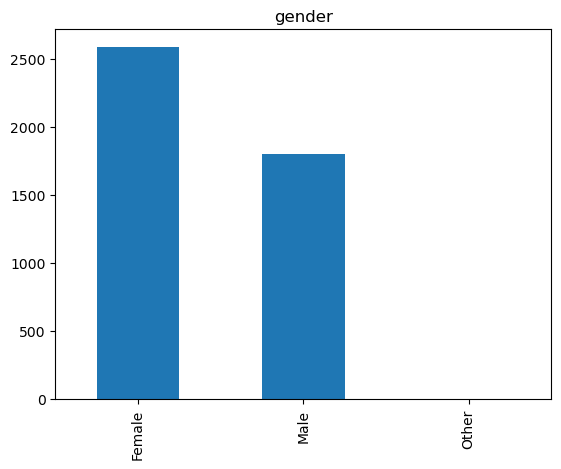

     Total data  Persentase
Yes        2730        62.3
No         1653        37.7



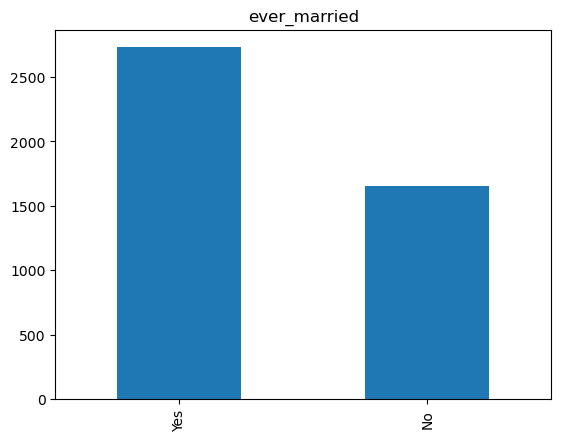

               Total data  Persentase
Private              2476        56.5
children              675        15.4
Self-employed         659        15.0
Govt_job              551        12.6
Never_worked           22         0.5



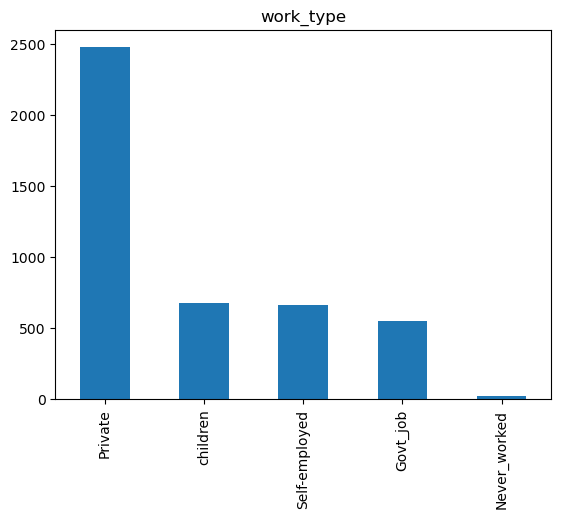

       Total data  Persentase
Urban        2225        50.8
Rural        2158        49.2



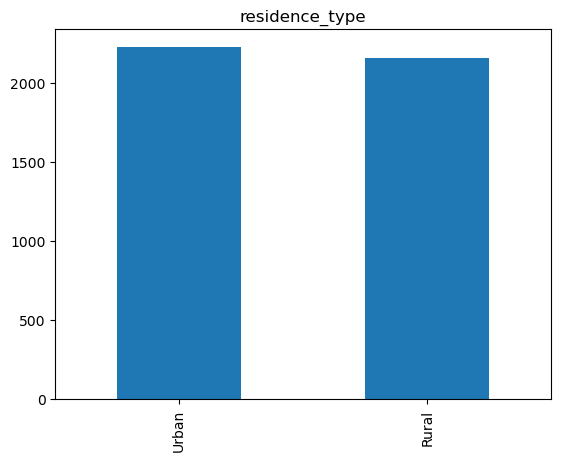

                 Total data  Persentase
never smoked           1592        36.3
Unknown                1417        32.3
formerly smoked         707        16.1
smokes                  667        15.2



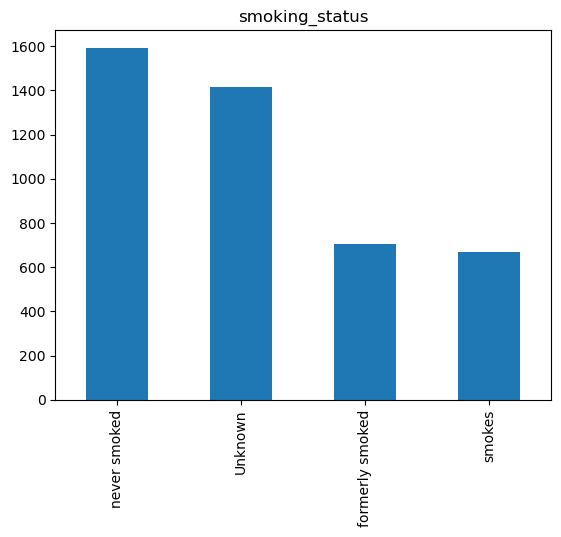

   Total data  Persentase
0        4057        92.6
1         326         7.4



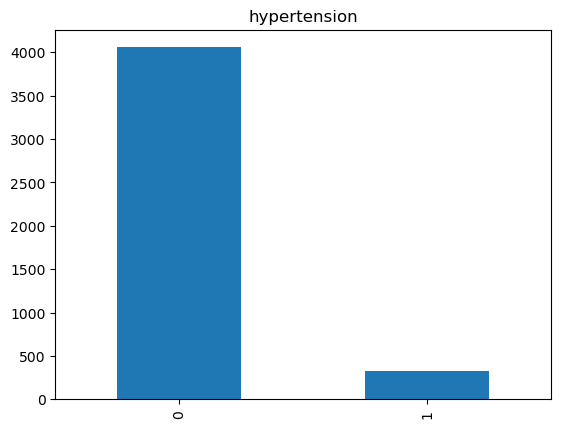

   Total data  Persentase
0        4211        96.1
1         172         3.9



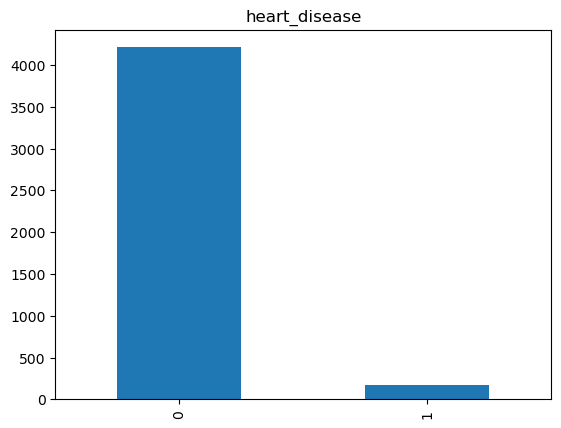

   Total data  Persentase
0        4219        96.3
1         164         3.7



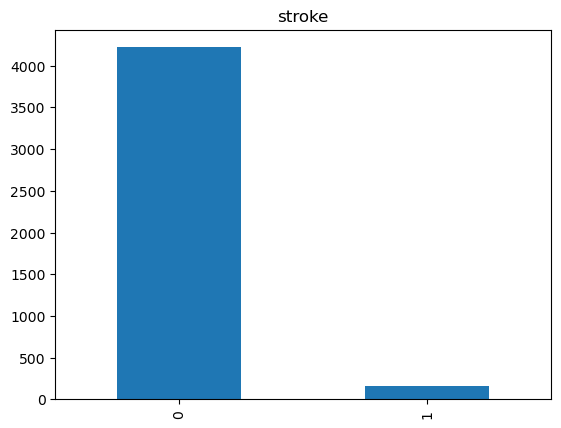

In [15]:
categorical_column = ["gender", "ever_married", "work_type", 
                      "residence_type", "smoking_status", 
                      "hypertension", "heart_disease", "stroke"]

for column in categorical_column:
    count = df[column].value_counts()
    percent = 100*df[column].value_counts(normalize=True)
    new_df = pd.DataFrame({'Total data':count, 'Persentase':percent.round(1)})
    print(new_df, end="\n\n")
    count.plot(kind='bar', title=column)
    plt.show()

### Numerical Features

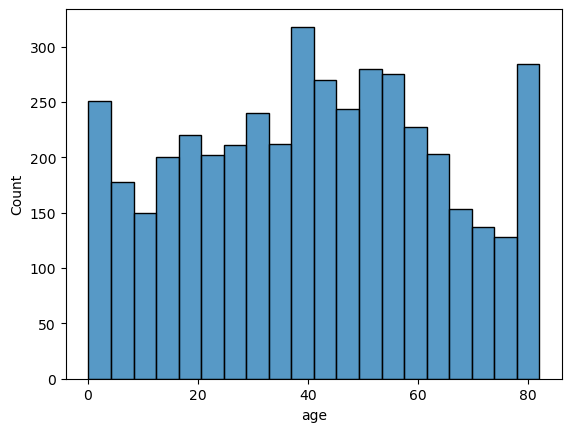

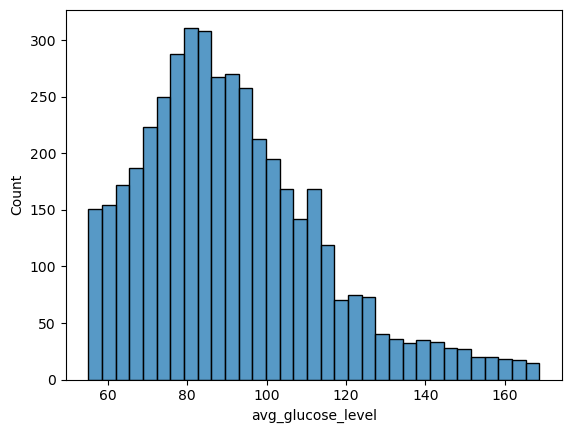

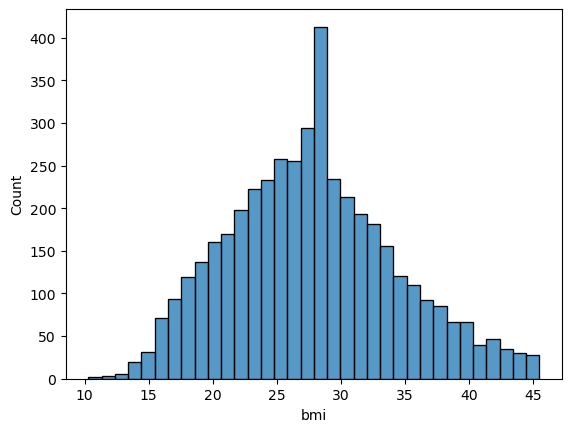

In [16]:
numerical_columns = ["age", "avg_glucose_level", "bmi"]

for column in numerical_columns:
    sns.histplot(df[column])
    plt.show()

## Multivariate Analysis
### Categorical Features

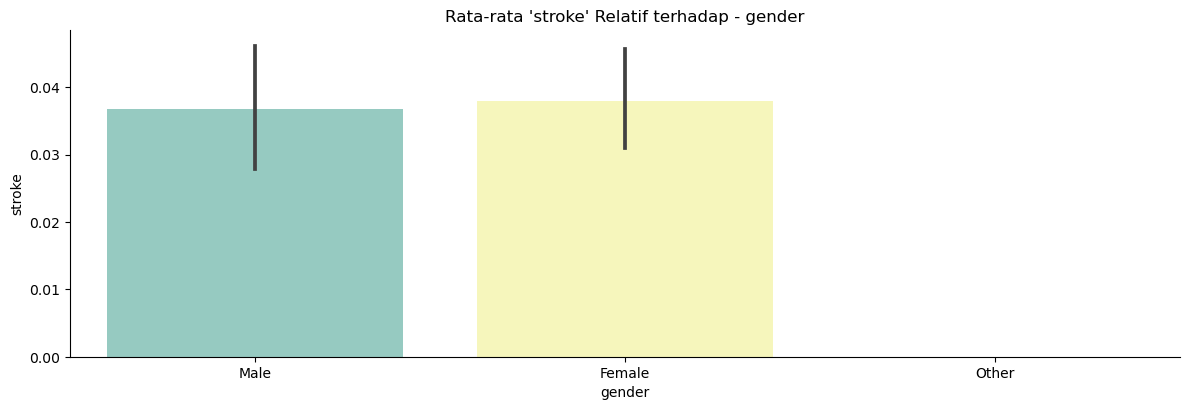

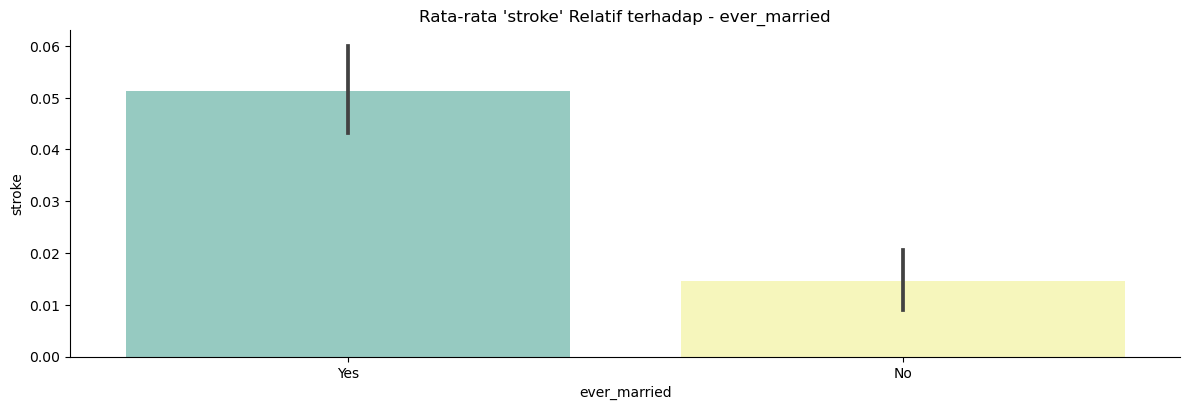

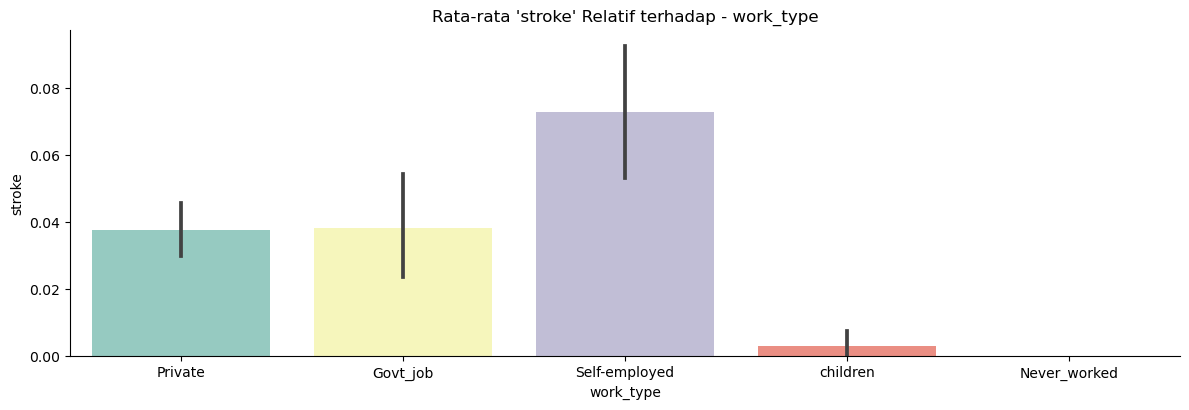

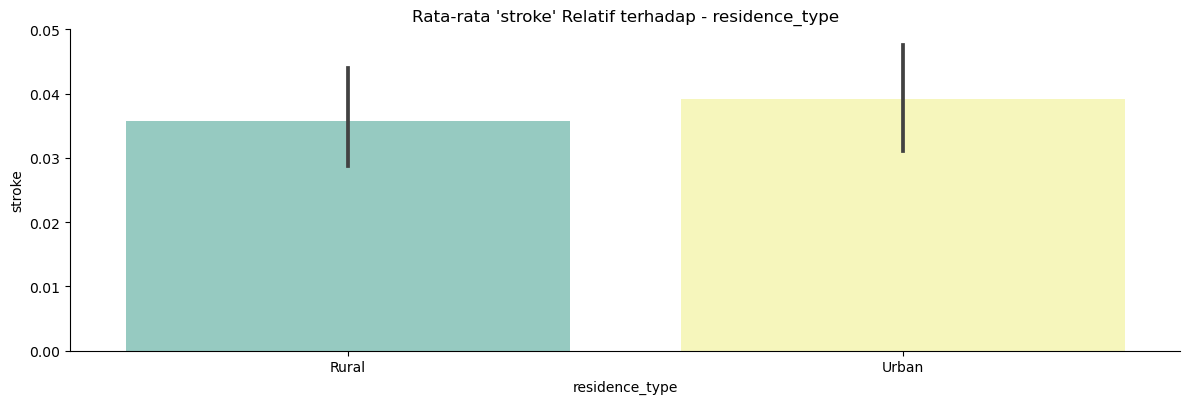

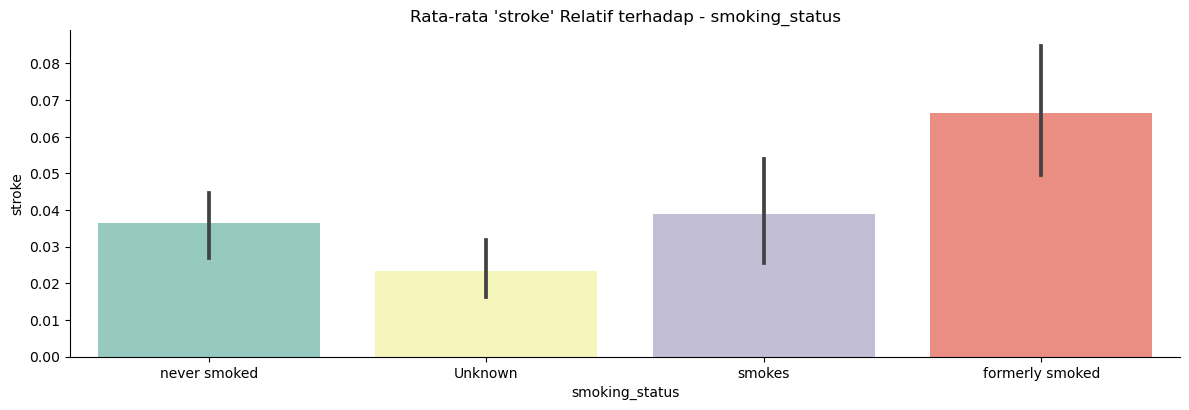

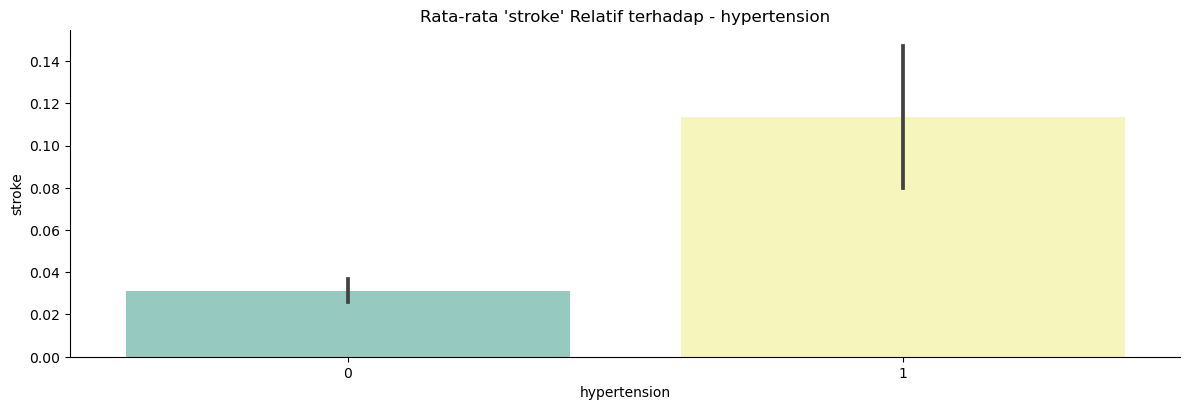

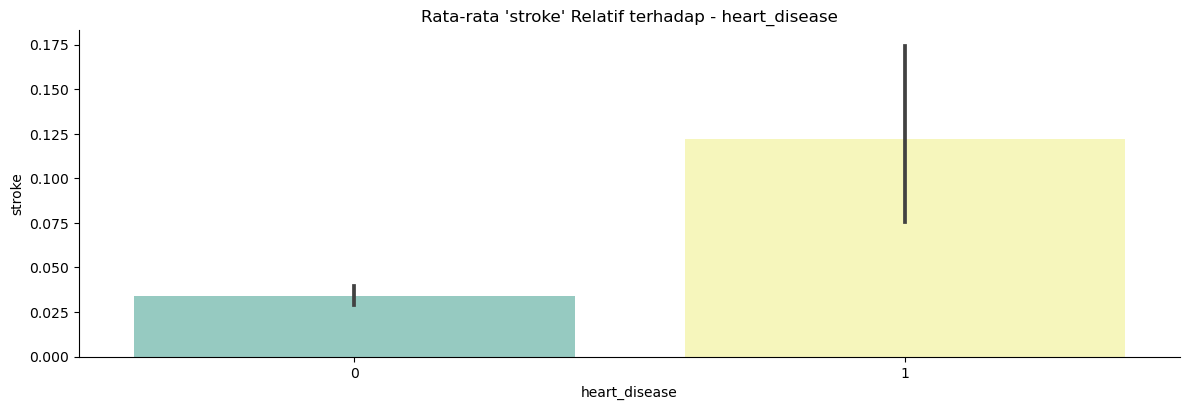

In [17]:
categorical_column = ["gender", "ever_married", "work_type", 
                      "residence_type", "smoking_status", 
                      "hypertension", "heart_disease"]

for col in categorical_column:
  sns.catplot(x=col, y="stroke", kind="bar", dodge=False, height=4, aspect=3,  
              data=df, palette="Set3")
  plt.title("Rata-rata 'stroke' Relatif terhadap - {}".format(col))
  plt.show()

plt.show()

### Numerical Features

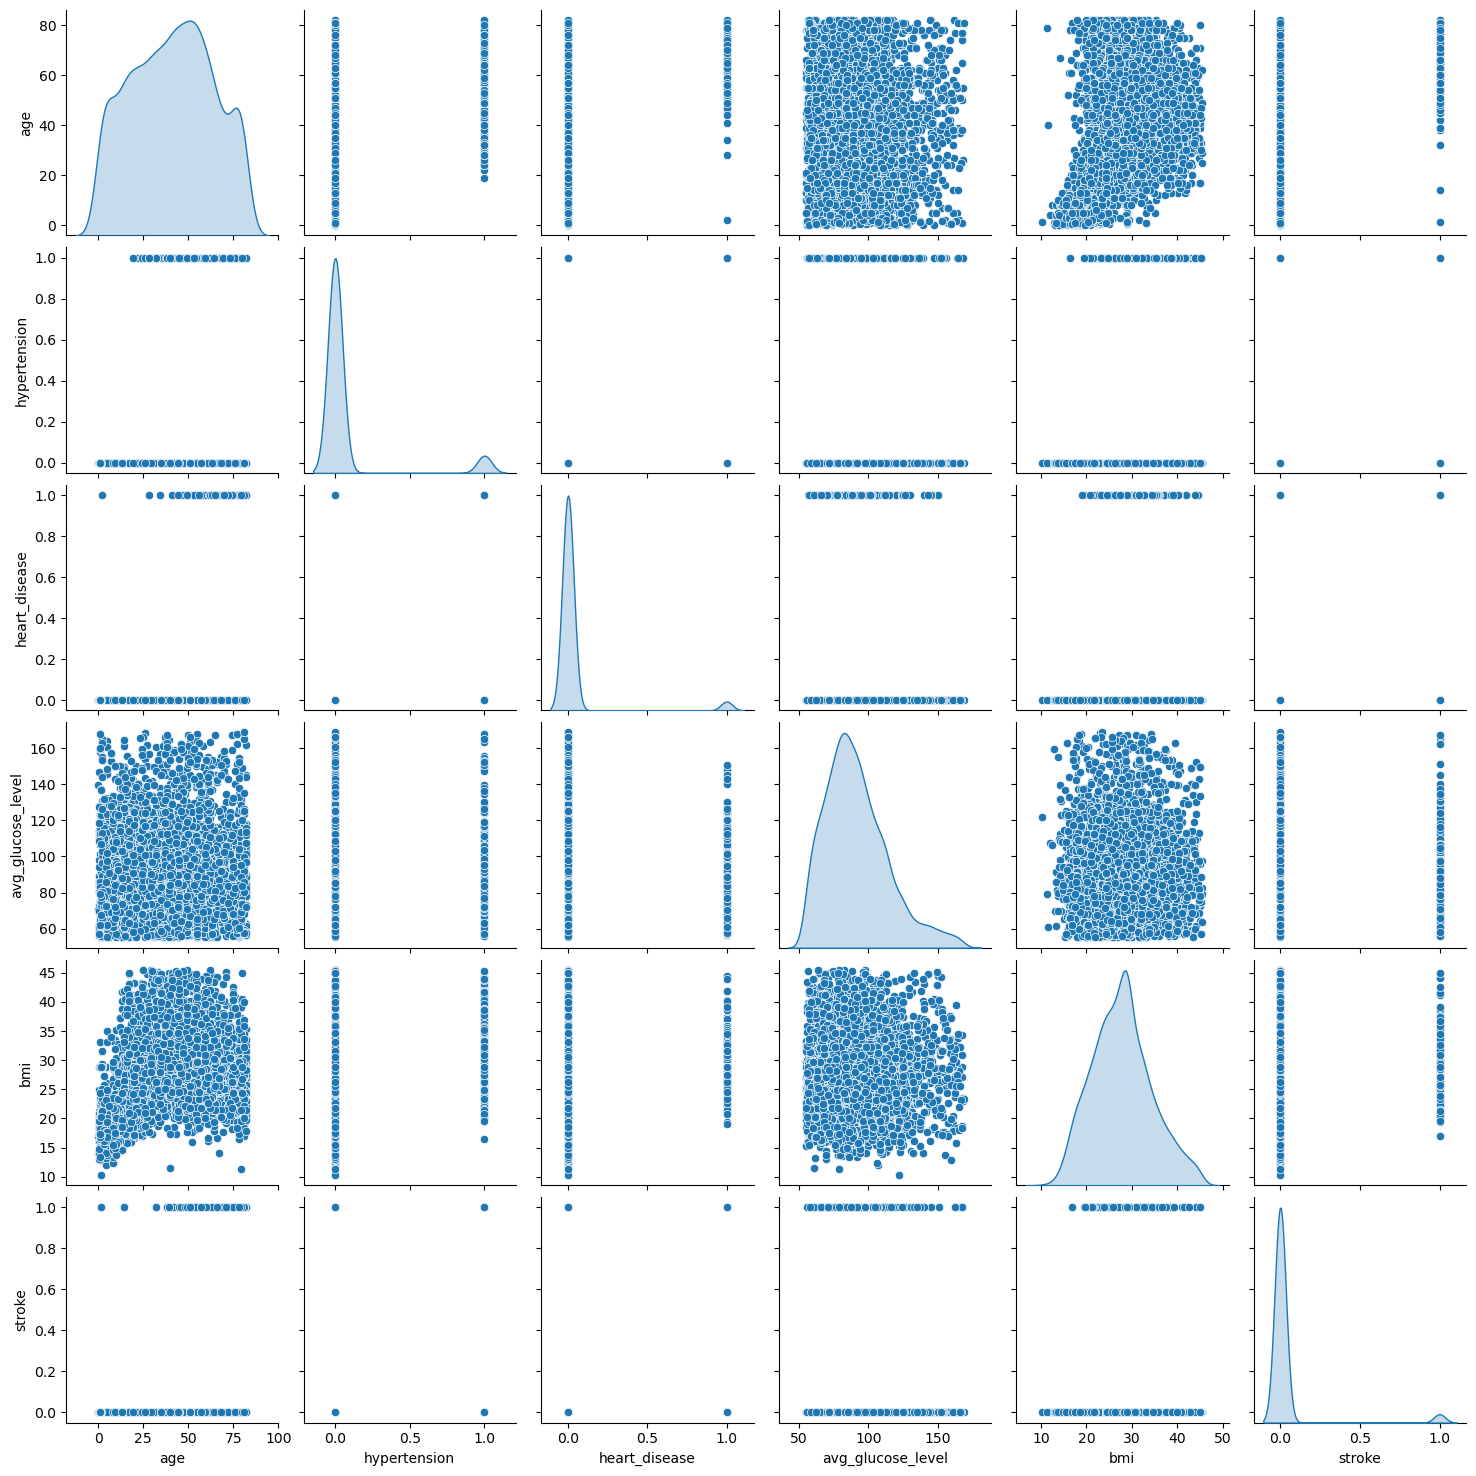

In [18]:
sns.pairplot(df, diag_kind="kde")
plt.show()

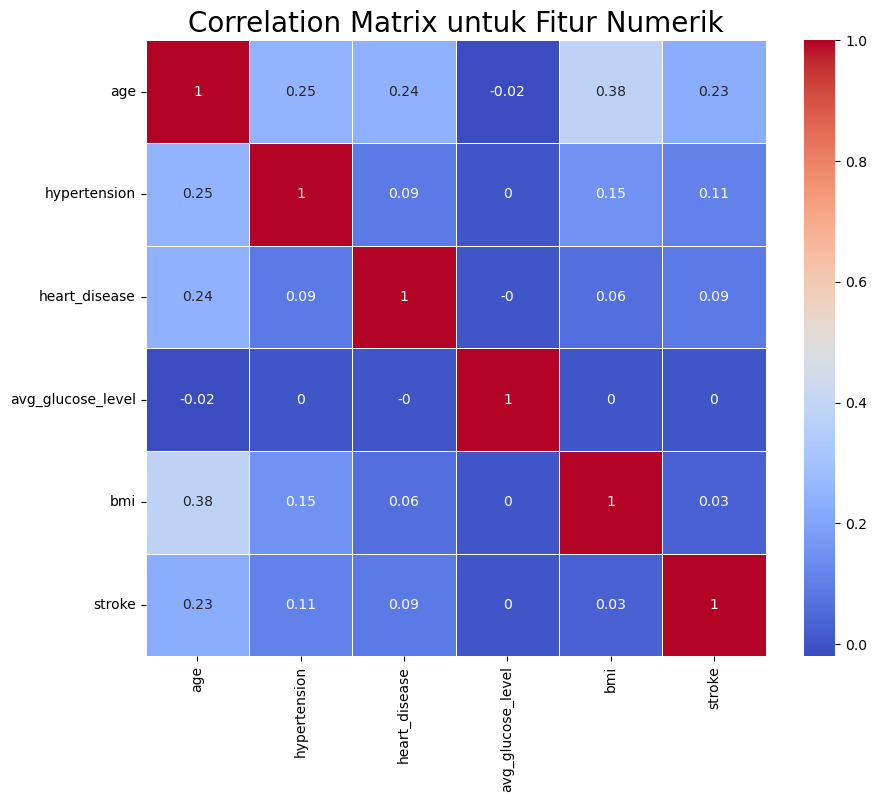

In [19]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix untuk Fitur Numerik", size=20)
plt.show()

### Dataframe Corelations

interval columns not set, guessing: ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


<AxesSubplot:>

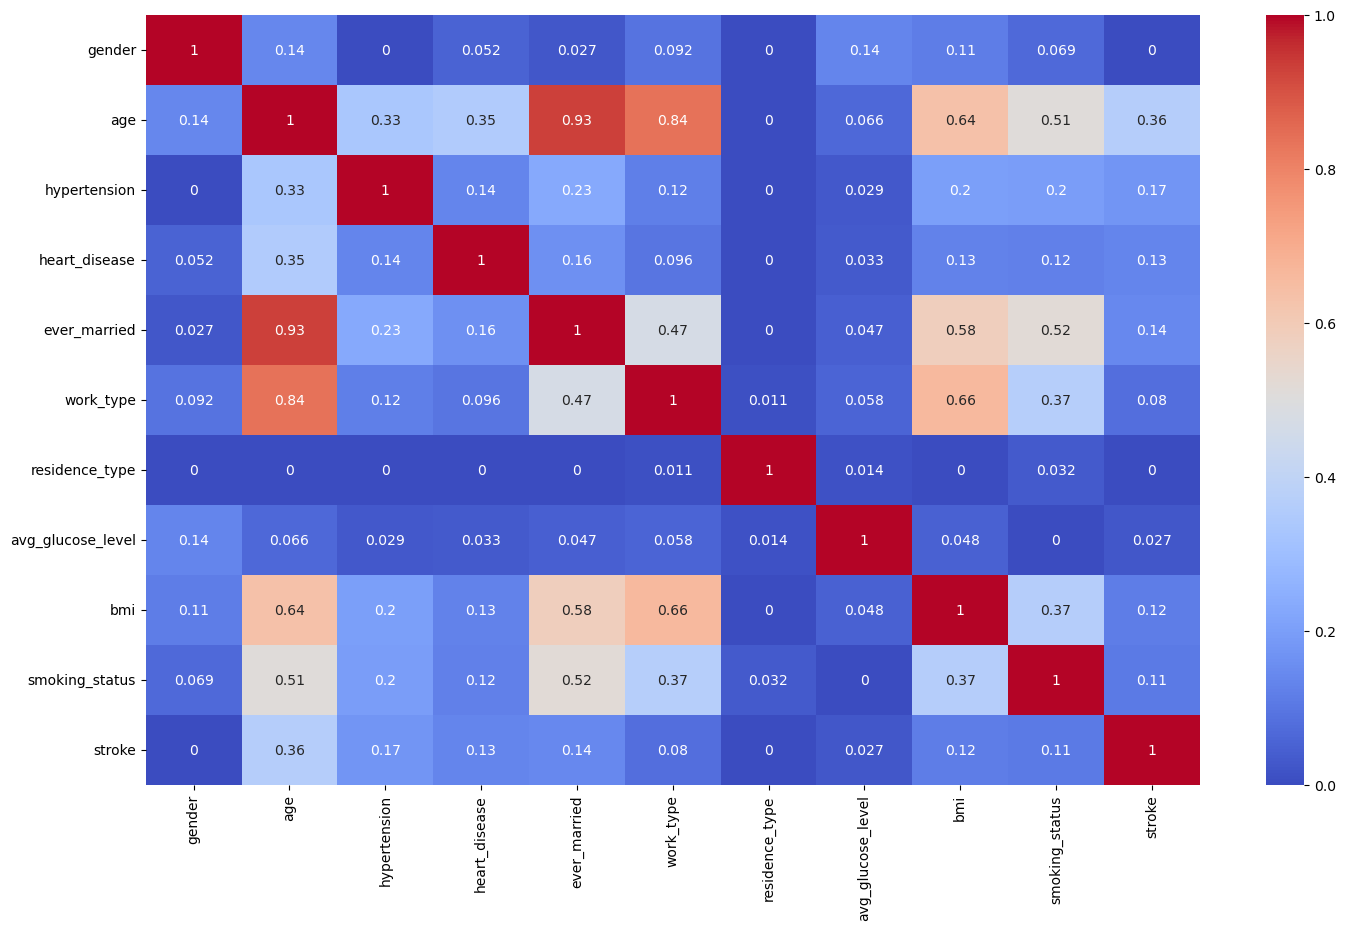

In [20]:
plt.figure(figsize=(17,10))
sns.heatmap(df.phik_matrix(),
            vmin=0,
            vmax=1,
            annot=True,
            cmap='coolwarm')

### Drop no corelation columns

In [21]:
print("Before Drop Column: ", df.columns)
df = df.drop(columns=["avg_glucose_level","gender","work_type","residence_type",])
print("\nAfter Drop Column: ", df.columns)

Before Drop Column:  Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

After Drop Column:  Index(['age', 'hypertension', 'heart_disease', 'ever_married', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


## Data Preparation
### Encoding

In [24]:
categorical_columns = [column for column in df.columns if df[column].dtype == 'O']
encoder = OrdinalEncoder()
df[categorical_columns] = encoder.fit_transform(df[categorical_columns])
df = df.astype("float64")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4383 entries, 2 to 5109
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4383 non-null   float64
 1   hypertension    4383 non-null   float64
 2   heart_disease   4383 non-null   float64
 3   ever_married    4383 non-null   float64
 4   bmi             4383 non-null   float64
 5   smoking_status  4383 non-null   float64
 6   stroke          4383 non-null   float64
dtypes: float64(7)
memory usage: 403.0 KB


### Scaling

In [26]:
all_columns = df.columns[:-1]
scaler = StandardScaler()
df[all_columns] = scaler.fit_transform(df[all_columns])
df.head()

,age,hypertension,heart_disease,ever_married,bmi,smoking_status,stroke
2,1.733246,-0.283469,4.947985,0.778135,0.725385,0.604481,1.0
6,1.467317,3.527717,4.947985,0.778135,-0.056744,0.604481,1.0
7,1.245710,-0.283469,-0.202102,-1.285124,-0.762194,0.604481,1.0
8,0.802495,-0.283469,-0.202102,0.778135,0.172257,-1.239249,1.0
9,1.644603,-0.283469,-0.202102,0.778135,-0.547492,-1.239249,1.0


### Check imbalance data 

In [27]:
num_df = len(df)
num_target1 = len(df.loc[df['stroke'] == 1])
num_target2 = len(df.loc[df['stroke'] == 0])
print("Number of stroke:  {0} ({1:2.2f}%)".format(num_target1, (num_target1/num_df) * 100))
print("Number of stroke: {0} ({1:2.2f}%)".format(num_target2, (num_target2/num_df) * 100))

Number of stroke:  164 (3.74%)
Number of stroke: 4219 (96.26%)


### Train test split

In [29]:
X = df.drop(columns=["stroke"])    
y = df["stroke"]
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, stratify=y, random_state=42)

In [30]:
print("Original Dataset Target1       : {0} ({1:0.2f}%)".format(len(df.loc[df['stroke'] == 1]), (len(df.loc[df['stroke'] == 1])/len(df.index)) * 100.0))
print("Original Dataset Target2     : {0} ({1:0.2f}%)".format(len(df.loc[df['stroke'] == 0]), (len(df.loc[df['stroke'] == 0])/len(df.index)) * 100.0))
print("")
print("Training Dataset Target1   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training Dataset Target2 : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test Dataset Target1       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test Dataset Target2     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original Dataset Target1       : 164 (3.74%)
Original Dataset Target2     : 4219 (96.26%)

Training Dataset Target1   : 115 (3.75%)
Training Dataset Target2 : 2953 (96.25%)

Test Dataset Target1       : 49 (3.73%)
Test Dataset Target2     : 1266 (96.27%)


## Model Development

In [32]:
svm = SVC()
svm.fit(X_train, y_train)

nb = GaussianNB()
nb.fit(X_train, y_train)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

lr = LogisticRegression()
lr.fit(X_train, y_train)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print("All models were created successfully")

All models were created successfully


### Model Evaluation

In [35]:
evaluation = pd.DataFrame(columns=['train', 'test'], index=["SVM","Naive Baiyes",
                                                            "Decision Tree", 
                                                            "Logistic Regression", 
                                                            "Random Forest"])
model_dict = {
    "SVM": svm,
    "Naive Baiyes": nb,
    "Decision Tree": dt,
    "Logistic Regression": lr,
    "Random Forest": rf
}
for name, model in model_dict.items():
    evaluation.loc[name, 'train'] = accuracy_score(y_true=y_train, 
                                                   y_pred=model.predict(X_train))
    evaluation.loc[name, 'test'] = accuracy_score(y_true=y_test, 
                                                  y_pred=model.predict(X_test))
 
evaluation

,train,test
SVM,0.962516,0.962738
Naive Baiyes,0.89146,0.895817
Decision Tree,0.998696,0.94981
Logistic Regression,0.962516,0.962738
Random Forest,0.998696,0.958175


### Evaluation Plot

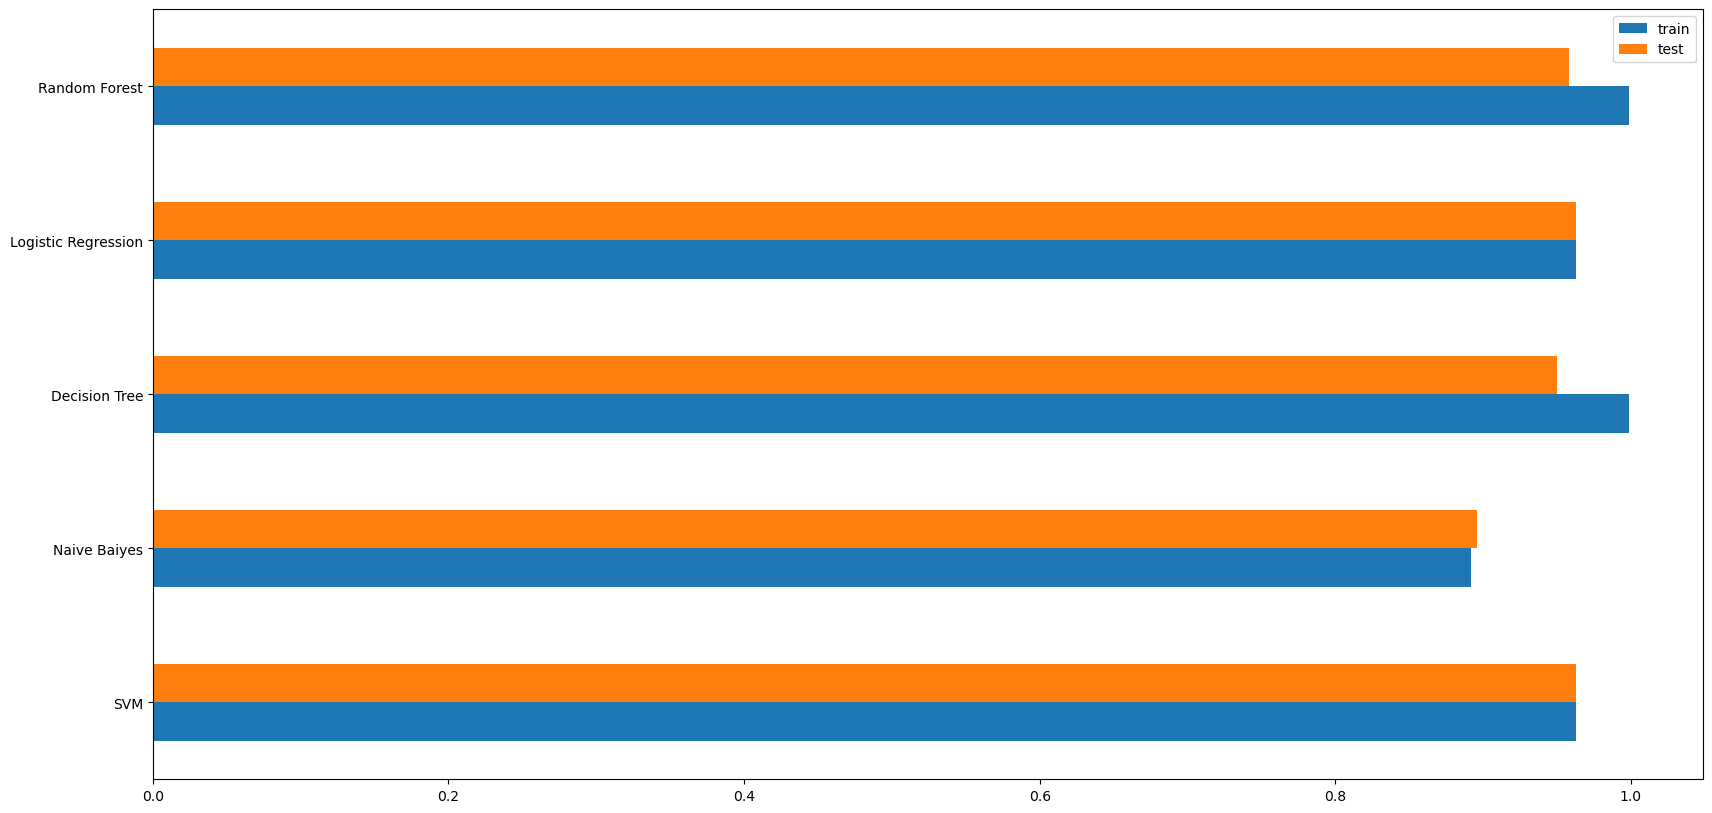

In [41]:
evaluation.plot(kind='barh', figsize=(20, 10))
plt.show()

In [43]:
prediksi = X_test.iloc[:10].copy()
pred_dict = {'y_true':y_test[:10]}
for name, model in model_dict.items():
    pred_dict['Prediction '+name] = model.predict(prediksi).round(1)
    
pd.DataFrame(pred_dict)

,y_true,Prediction SVM,Prediction Naive Baiyes,Prediction Decision Tree,Prediction Logistic Regression,Prediction Random Forest
574,0.0,0.0,0.0,0.0,0.0,0.0
721,0.0,0.0,0.0,0.0,0.0,0.0
1630,0.0,0.0,0.0,1.0,0.0,0.0
3755,0.0,0.0,0.0,0.0,0.0,0.0
3563,0.0,0.0,1.0,0.0,0.0,0.0
3883,0.0,0.0,0.0,0.0,0.0,0.0
3835,0.0,0.0,0.0,0.0,0.0,0.0
246,1.0,0.0,0.0,0.0,0.0,0.0
2850,0.0,0.0,0.0,0.0,0.0,0.0
4213,0.0,0.0,0.0,0.0,0.0,0.0
